In [115]:
#%% Importing needed packages
import pandas as pd
import re

#
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

#
from nltk import word_tokenize
from nltk.stem.isri import ISRIStemmer
from farasa.stemmer import FarasaStemmer
from nltk.stem import PorterStemmer

from wordcloud import WordCloud
import arabic_reshaper 
from bidi.algorithm import get_display

# %% Cleaning functions
def combine(list_of_text):

    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

def word_count(text):
    return len(text.split())

def cleaning(verse):
    # for the Arabic version
    verse = re.sub("[ًًٌٌٍٍَُِّّْٰٓٓ]","",verse)
    verse = re.sub("[آ]","ا",verse)

    # for the English transelation
    verse = verse.lower()
    verse = re.sub("\[.*?\]","",verse)
    verse = re.sub("[(0-9)]","",verse)
    verse = re.sub("[-.,;:]","",verse)
    verse = re.sub("  "," ",verse)
    verse = verse.strip()

    return verse

def remove_basmalah(first_aya):
    first_aya = re.sub("بسم الله الرحمن الرحيم ", "", first_aya)
    
    return first_aya

# creating a function to add a basmalah at the begining of each chapter with verse_num = 0
def add_basmalah(quran, language):
    
    """This function will insert a 'basmalah' at the start of each chapter with verse_num = 0"""

    if language == "A":
        b = "بسم الله الرحمن الرحيم"
    elif language == "E":
        b = "in the name of allāh the entirely merciful the especially merciful"
    else:
        print("invalide value or language; 'A' for Arabic or 'E' for English")
    
    a = list(quran[quran.verse_num == 1].index)
    a.remove(0)
    
    for chapter, i in enumerate(a):
        quran.loc[i-0.5] = {"chapter_num":chapter + 2,"verse_num":0,"verse":b}
    
    quran.iloc[0].verse = b

    quran = quran.drop(index= quran[(quran.chapter_num == 9) & (quran.verse_num == 0)].index)
    quran = quran.sort_index().reset_index(drop= True)
    return quran

# %%
def word_cloud_generater(text,stopwords_list):
    # import arabic_reshaper 
    # from bidi.algorithm import get_display
    # from wordcloud import WordCloud

    stw=[]
    for i in stopwords_list:
        i = arabic_reshaper.reshape(i)
        i = get_display(i)
        stw.append(i)


    wc = WordCloud(stopwords=stw, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, font_path="../font/times.ttf"
               )

    text = arabic_reshaper.reshape(text)
    text = get_display(text) 

    wc.generate(text)
    return(wc)

In [121]:
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
from func import *

In [42]:
A_quran = pd.read_pickle("../pickle/A_by_chapter.pkl")
E_quran = pd.read_pickle("../pickle/E_by_chapter.pkl")

A_dtm= pd.read_pickle("../pickle/A_dtm.pkl")
E_dtm= pd.read_pickle("../pickle/E_dtm.pkl")

# EDA

In [43]:
A_dtm

,آباء,آتى,آثر,آخذ,آخر,آذى,آلى,آمن,آنام,آوى,...,يوعون,يوفضون,يوق,يوقن,يولج,يولن,يولو,يوم,يومئذ,يونس
chapter_num,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,5,0,3,8,0,1,17,0,0,...,0,0,0,2,0,0,0,25,0,0
3,0,4,0,0,2,0,0,7,0,0,...,0,0,0,0,0,0,1,16,1,0
4,0,5,0,0,7,0,0,8,0,0,...,0,0,0,0,0,0,0,9,1,1
5,0,3,0,2,3,0,0,3,0,0,...,0,0,0,1,0,0,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
A_dtm.T[7].sort_values(ascending=False).head(20)

قال     106
رب       65
الله     62
قوم      48
أرض      21
موسى     21
جاء      19
كذب      18
باي      18
حق       14
أتى      13
هدى      12
أمر      12
خلق      11
رسول     11
جنة      11
يوم      11
عمل      11
أرسل     10
قرية     10
Name: 7, dtype: int64

In [45]:
# Find the top 30 words said by each 
top_dict = {}
for c in A_dtm.T.columns:
    top = A_dtm.T[c].sort_values(ascending=False).head(20)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{1: [('الله', 2),
  ('صراط', 2),
  ('رحيم', 2),
  ('رحمن', 2),
  ('ضال', 1),
  ('استعان', 1),
  ('حمد', 1),
  ('عالم', 1),
  ('دين', 1),
  ('أنعم', 1),
  ('مستقيم', 1),
  ('رب', 1),
  ('يوم', 1),
  ('عبد', 1),
  ('مغضوب', 1),
  ('مالك', 1),
  ('اهد', 1),
  ('بسم', 1),
  ('قعد', 0),
  ('قطوف', 0)],
 2: [('الله', 283),
  ('قال', 132),
  ('رب', 49),
  ('ناس', 39),
  ('امن', 31),
  ('كفر', 30),
  ('أولائك', 28),
  ('كتاب', 27),
  ('خير', 26),
  ('اتقى', 25),
  ('يوم', 25),
  ('أرض', 24),
  ('عمل', 23),
  ('هدى', 22),
  ('شيء', 22),
  ('حق', 22),
  ('أنزل', 21),
  ('عليم', 21),
  ('شاء', 21),
  ('أنفق', 19)],
 3: [('الله', 210),
  ('قال', 71),
  ('رب', 41),
  ('كتاب', 32),
  ('كفر', 31),
  ('ناس', 19),
  ('شيء', 17),
  ('رسول', 17),
  ('عذاب', 16),
  ('يوم', 16),
  ('مؤمن', 16),
  ('شاء', 15),
  ('أحب', 15),
  ('أمر', 15),
  ('امن', 15),
  ('اتقى', 14),
  ('أولائك', 14),
  ('قتل', 13),
  ('أرض', 13),
  ('خير', 13)],
 4: [('الله', 230),
  ('قال', 35),
  ('رسول', 28),
  ('سبيل', 27),
  ('كفر'

In [46]:
# Print the top 10 words in each chapter
for chapter, top_words in top_dict.items():
    print(chapter)
    print(', '.join([word for word, count in top_words]))
    print('---')

1
الله, صراط, رحيم, رحمن, ضال, استعان, حمد, عالم, دين, أنعم, مستقيم, رب, يوم, عبد, مغضوب, مالك, اهد, بسم, قعد, قطوف
---
2
الله, قال, رب, ناس, امن, كفر, أولائك, كتاب, خير, اتقى, يوم, أرض, عمل, هدى, شيء, حق, أنزل, عليم, شاء, أنفق
---
3
الله, قال, رب, كتاب, كفر, ناس, شيء, رسول, عذاب, يوم, مؤمن, شاء, أحب, أمر, امن, اتقى, أولائك, قتل, أرض, خير
---
4
الله, قال, رسول, سبيل, كفر, مؤمن, امن, نساء, عليم, ناس, كتاب, مال, عظيم, أولائك, أراد, فضل, حكيم, أجر, عذاب, شيء
---
5
الله, قال, امن, رسول, كفر, أنزل, قوم, رب, كتاب, أرض, اتقى, يد, شيء, ابن, كثير, عمل, جاء, قتل, مريم, حكم
---
6
الله, قال, رب, شيء, قوم, كذب, أرض, آمن, جاء, هدى, أتى, شاء, أشرك, كتاب, أنزل, حق, سماء, ذكر, اي, حرم
---
7
قال, رب, الله, قوم, أرض, موسى, جاء, كذب, باي, حق, أتى, هدى, أمر, خلق, رسول, جنة, يوم, عمل, أرسل, قرية
---
8
الله, كفر, امن, مؤمن, قال, حق, قلب, رسول, عليم, شيء, سبيل, نصر, رب, اعلم, هاجر, غلب, أنفق, حكيم, أراد, ولي
---
9
الله, رسول, قال, كفر, مؤمن, قوم, سبيل, قلب, عمل, امن, كافر, تاب, يوم, مال, مشرك, عليم, رضي, عذاب

In [47]:
A_quran.head(5)

,avr_verse_length,length,num_verses,makki_or_madani,verses,stemmed
chapter_num,,,,,,
1,4.142857,29,7,Makki,بسم الله الرحمن الرحيم الحمد لله رب العالمين ا...,بسم الله رحمن رحيم حمد الله رب عالم رحمن رحيم ...
2,21.411150,6145,287,Madani,بسم الله الرحمن الرحيم الم ذلك الكتاب لا ريب ف...,بسم الله رحمن رحيم الم ذلك كتاب لا ريب في هدى ...
3,17.437811,3505,201,Madani,بسم الله الرحمن الرحيم الم الله لا إله إلا هو ...,بسم الله رحمن رحيم الم الله لا إله إلا هو حي ق...
4,21.282486,3767,177,Madani,بسم الله الرحمن الرحيم يا أيها الناس اتقوا ربك...,بسم الله رحمن رحيم يا أي ناس اتقى رب الذي خلق ...
5,23.479339,2841,121,Madani,بسم الله الرحمن الرحيم يا أيها الذين امنوا أوف...,بسم الله رحمن رحيم يا أي الذي امن أوفى عقد أحل...


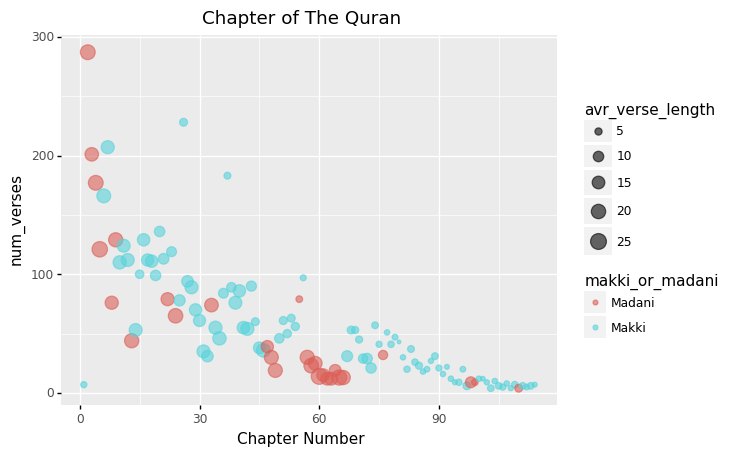

<ggplot: (8777017628627)>

In [66]:

(ggplot(data= A_quran)
 + geom_point(aes(A_quran.index,"num_verses", size="avr_verse_length", color="makki_or_madani"),alpha= 0.6)
+ ggtitle("Chapter of The Quran")
+ xlab("Chapter Number"))

In [61]:
total_words = A_quran.length.sum()

# percentage of each chapter
chap_per=(A_quran.length / total_words) * 100

chap_per[A_quran.makki_or_madani == "Makki"].sum()

61.31530518351908

## Is there a significant difference between Makki and Madani chapters?

In [89]:
# creating a summery table to  look at makki & madani chapters
nuzol = A_quran.groupby("makki_or_madani").length.agg(["mean","sum","count"])
nuzol["percentage"] = (nuzol["sum"]/nuzol["sum"].sum())*100
nuzol.columns = ["avg_words", "total_words", "count", "percentage_words"]
nuzol = nuzol[["avg_words","total_words","percentage_words", "count"]]

nuzol["stemmed_verses"]=A_quran.groupby("makki_or_madani").stemmed.apply(combine)
nuzol


,avg_words,total_words,percentage_words,count,stemmed_verses
makki_or_madani,,,,,
Madani,1081.071429,30270,38.684695,28,بسم الله رحمن رحيم الم ذلك كتاب لا ريب في هدى ...
Makki,557.883721,47978,61.315305,86,بسم الله رحمن رحيم حمد الله رب عالم رحمن رحيم ...


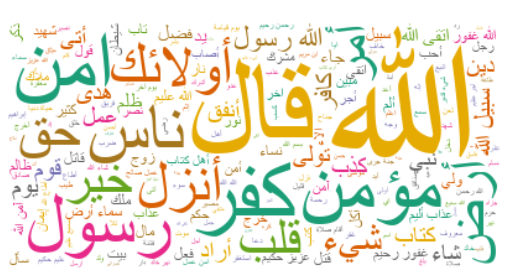

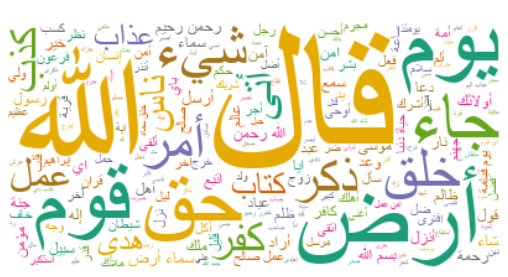

In [128]:
# creating word clouds.
from nltk.corpus import stopwords
stopwords_list=stopwords.words("arabic")

for i in [0,1]:
    wc =word_cloud_generater(nuzol.stemmed_verses[i], stopwords_list)

    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1+i)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(nuzol.index[i], color="white")



- we can notice that some words are frecuent in **Madani**'s chapters, but not in Makki chapters. such as **{مؤمن, كفر, رسول,قلب,}**
- on the other hand **{يوم, عذاب, قوم}** are more comen in the **Makki** chapters.

In [124]:
E_nuzol = E_quran.groupby("makki_or_madani").length.agg(["mean","sum","count"])
E_nuzol["percentage"] = (E_nuzol["sum"]/E_nuzol["sum"].sum())*100
E_nuzol.columns = ["avg_words", "total_words", "count", "percentage_words"]
E_nuzol = E_nuzol[["avg_words","total_words","percentage_words", "count"]]

E_nuzol["stemmed_verses"]=E_quran.groupby("makki_or_madani").stemmed.apply(combine)
E_nuzol


,avg_words,total_words,percentage_words,count,stemmed_verses
makki_or_madani,,,,,
Madani,2049.250000,57379,38.066648,28,in the name of allāh the entir merci the espec...
Makki,1085.511628,93354,61.933352,86,in the name of allāh the entir merci the espec...


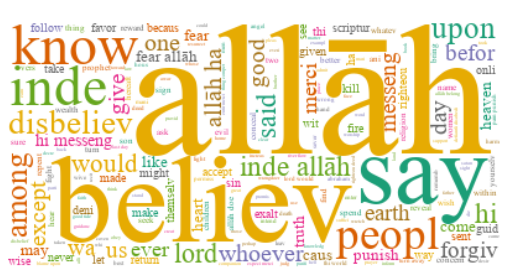

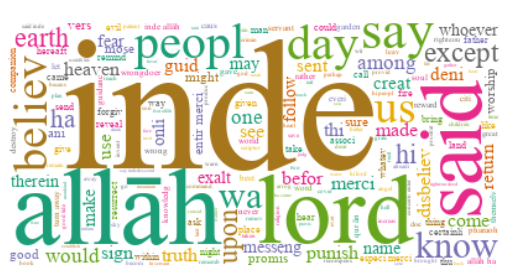

In [130]:
wc = WordCloud(stopwords=stopwords.words("english"), background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, font_path="../font/times.ttf"
               )

for i in [0,1]:
    wc.generate(E_nuzol.stemmed_verses[i])

    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1+i)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(nuzol.index[i], color="white")